### Python金融投资策略实战（基于Jupyter Notebook）
## <center>利用京东数科EMAI(挖掘机生产活跃度指数)制定基建投资策略</center>
### <center>策略制定及验证：张君颖  ； 报告日期：2020.10.11</center>
  <font color=blue><center>本报告不构成投资建议，转载需注明作者且不得删改</center></font>
  <font color=blue><center>作者邮箱：zhang.jun.ying@outlook.com</center></font>
### 第一步: 导入需要使用的python库，并进行数据描述

In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
%matplotlib inline

### 下载EMAI数据，保存成csv格式，使用pandas导入数据
EMAI数据来源：JT<sup>2</sup>智管有方—>咨询研究—>另类数据研究：        
https://jt2.jd.com/information/jtzx/html/dataResearch     
数据采样时间：2018.12-2020.9

In [2]:
data=pd.read_csv('C:/Users/lotbear/Desktop/EMAI-2020-9.csv',index_col=0,parse_dates=True)

### 打印/查看数据 前5行
注：EMAI指数以2018.12月作为起始点，每月4日更新

In [3]:
data.head()

,EMAI
Time,
2018-12-04,100.0
2019-01-04,106.8
2019-02-04,85.3
2019-03-04,108.2
2019-04-04,107.5


### 查看数据信息
起止日期：2018.12.4~2020.9.4    
数据量：22个月更数据

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2018-12-04 to 2020-09-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EMAI    22 non-null     float64
dtypes: float64(1)
memory usage: 352.0 bytes


### 数据的统计性描述

In [5]:
data.describe()

,EMAI
count,22.000000
mean,103.072727
std,13.484283
min,67.000000
25%,95.525000
50%,104.450000
75%,110.450000
max,123.600000


### 数据制图

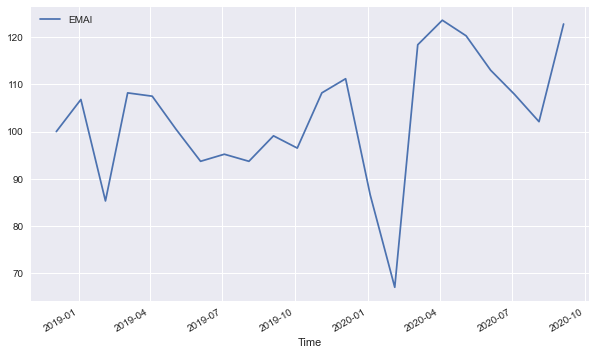

In [6]:
data.plot(figsize=(10, 6))

### 第二步
### 基于月更的EMAI指数，使用SMA算法（simple moving average）制定交易决策
这里使用3个月的数据作为 short-SMA，使用9个月的数据作为 long-SMA   
当 short-SMA > long-SMA , 给出基建产业买入评级   
当 short-SMA < long-SMA , 给出基建产业卖出评级   

In [7]:
data['SMA_short'] = data['EMAI'].rolling(window=3).mean()
data['SMA_long'] = data['EMAI'].rolling(window=9).mean()

### 制定交易决策：position头寸选择：
当 SMA_short > SMA_long , 作为买入基建证券的信号 1   
当 SMA_short < SMA_long , 作为卖出基建证券的信号 -1

In [8]:
data['positions'] = np.where(data['SMA_short'] > data['SMA_long'],1,-1)

In [9]:
data['positions']

Time
2018-12-04   -1
2019-01-04   -1
2019-02-04   -1
2019-03-04   -1
2019-04-04   -1
2019-05-04   -1
2019-06-04   -1
2019-07-04   -1
2019-08-04   -1
2019-09-04   -1
2019-10-04   -1
2019-11-04    1
2019-12-04    1
2020-01-04    1
2020-02-04   -1
2020-03-04   -1
2020-04-04    1
2020-05-04    1
2020-06-04    1
2020-07-04    1
2020-08-04    1
2020-09-04    1
Name: positions, dtype: int32

### 用 Matplotlib 对策略进行可视化
其中，红线为 position 头寸，对应右侧坐标轴，若为 1 则买入，若为 -1 则卖出

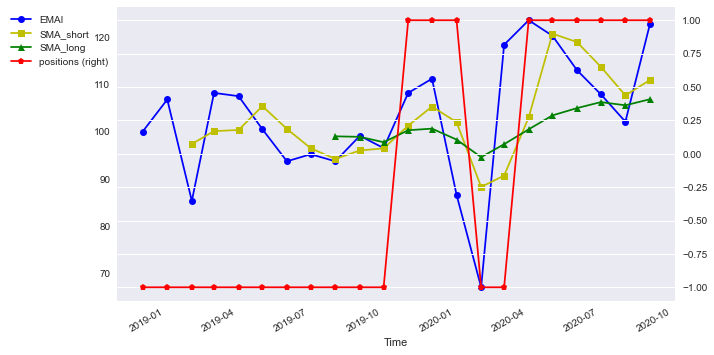

In [10]:
ax=data[['EMAI','SMA_short','SMA_long','positions']].plot(figsize=(10, 6),secondary_y='positions',
                                                          style=['-o', '-s', '-^', '-p'],
                                                         color=['b','y','g','r'])
ax.get_legend().set_bbox_to_anchor((0, 1))

### 策略具体交易时间节点：
2019.11月初买入   
2020.2月初卖出   
2020.4月买入，并一直持有至今   

### 宏观经济验证了策略的优越性：
从时间节点上看，short-long SMA策略，在2月初便卖出了基建行业证券，成功避开疫情爆发窗口，又在经济刺激政策落地前，即4月初，以低价买入并持有基建行业证券。      

### 第三步
### 产业基金指数交易策略验证
选择 <font color=red>“广发中证基建工程指数C (005224)”</font>作为交易策略验证对象    
<font color=blue>注：该基金是作者 “随机选择” 的产业指数基金，并非推荐</font>    
数据来源：天天基金网；数据采样区间：2018.12.3~2020.10.9     
http://fundf10.eastmoney.com/jjjz_005224.html

In [11]:
fund_data=pd.read_csv('C:/Users/lotbear/Desktop/广发中证基建工程指数C (005224).csv',index_col=0,parse_dates=True)

### 打印/查看数据  前5行
其中：<font color=blue>net_value为基金净值；cum_value为基金累计净值；return%为基金日回报率</font>

In [12]:
fund_data.head()

,net_value,cum_value,return%
date,,,
2018-12-03,0.7821,0.7821,2.01
2018-12-04,0.7895,0.7895,0.95
2018-12-05,0.7815,0.7815,-1.01
2018-12-06,0.7716,0.7716,-1.27
2018-12-07,0.7834,0.7834,1.53


### 查看数据信息
起止日期：2018.12.3~2020.10.9   
数据量：448个交易日

In [13]:
fund_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 448 entries, 2018-12-03 to 2020-10-09
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   net_value  448 non-null    float64
 1   cum_value  448 non-null    float64
 2   return%    448 non-null    float64
dtypes: float64(3)
memory usage: 14.0 KB


### 数据统计性描述

In [14]:
fund_data.describe()

,net_value,cum_value,return%
count,448.000000,448.000000,448.000000
mean,0.766507,0.766507,0.004821
std,0.049255,0.049255,1.423860
min,0.670600,0.670600,-9.050000
25%,0.735150,0.735150,-0.710000
50%,0.761250,0.761250,-0.075000
75%,0.785025,0.785025,0.740000
max,0.930300,0.930300,6.990000


### 数据制图
注意到：黄线（cum_value）完全覆盖了 蓝线（net_value）  
这意味着，该基金在这段时间里没有进行拆分或分红    
另外，红线为 return%，以右侧坐标轴为准绘制

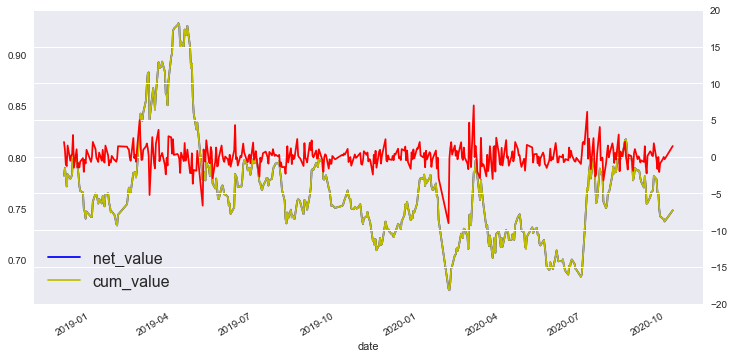

In [15]:
bx=fund_data[['net_value','cum_value','return%']].plot(figsize=(12, 6),color=['b','y','r'],secondary_y='return%')
plt.ylim(-20,20)
bx.legend(fontsize = 16,loc=3)

### 根据 EMAI 指数，制定 ‘基建行业指数基金’ 交易策略
交易策略时间节点：   
2019.11.1买入      
2020.1.23卖出（春节休市前一交易日）  
2020.4.1买入，并一直持有至今（截止日期：2020.10.9）    
注：position 头寸有两种状态，1为持有，0为空仓，这里不考虑做空机制

In [16]:
import time
fund_data['position'] = np.where((fund_data.index>'2019-11-1')&(fund_data.index<'2020-1-23')
                                 |(fund_data.index>'2020-4-1'),1,0)


### 绘制交易策略
蓝线为基金净值   
红线为 position 头寸，对应右侧坐标轴，若为 1 则持有，若为 0 则空仓

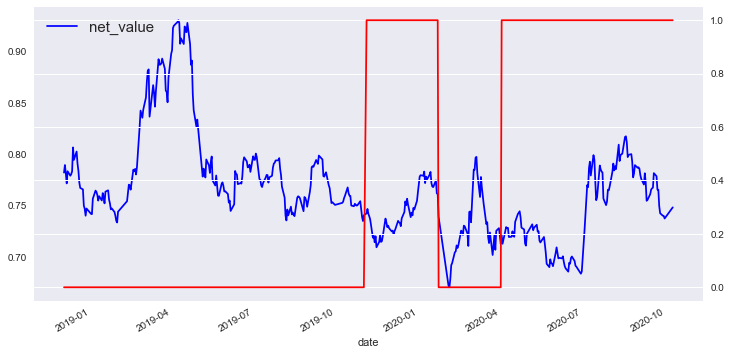

In [17]:
fx=fund_data[['net_value','position']].plot(figsize=(12, 6),color=['b','r'],secondary_y='position')
fx.legend(fontsize=15,loc=2)

### 若该策略执行，所对应的投资回报率
该策略对应的每日回报率

In [18]:
fund_data['strategy_return%']=fund_data['position']*fund_data['return%']

In [19]:
fund_data['strategy_return%'].describe()

count    448.000000
mean       0.019978
std        0.762012
min       -3.230000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.120000
Name: strategy_return%, dtype: float64

EMAI 策略累计回报率：<font color=red>8.95%</font> ; 基建行业指数基金累计回报率：<font color=blue>2.16%</font>

In [20]:
fund_data['strategy_return%'].sum()

8.95

In [21]:
fund_data['return%'].sum()

2.159999999999997

### EMAI 投资策略 <font color=red>大战</font> 基建指数基金 
在相同时间窗口，<font color=red>基于EMAI指数策略的累计回报率</font> **VS** <font color=blue>基建指数基金累计回报率</font>    
红方：EMAI 投资策略    
蓝方：广发中证基建工程指数C(005224)  

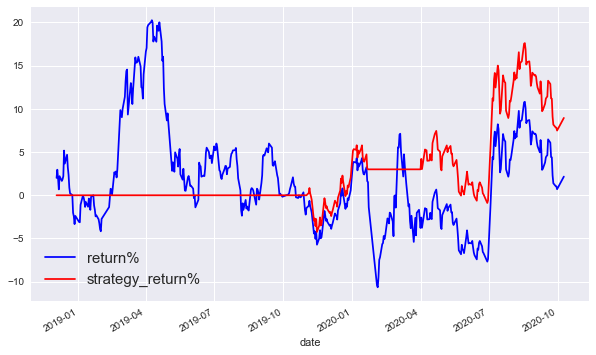

In [22]:
PK =fund_data[['return%','strategy_return%']].cumsum().plot(figsize=(10,6),color=['b','r'])
PK.legend(fontsize=15,loc=0)

### 交易策略战况小结：
EMAI 策略累计回报率：<font color=red>8.95%</font> >>> 基建行业指数基金累计回报率：<font color=blue>2.16%</font>   
虽然此次基于EMAI指数的策略 <font color=red>战胜了</font> 基建行业指数基金，但在2018.12~2019.10区间，该策略仍需优化。

### 最后关于 EMAI 的一点思考：
如果将EMAI指数换成日更数据，会增强用户粘性，具体日更方法：  
针对不同统计口径的挖掘机产量数据，如果当日没有出最新数据，则保留上一期值，如果数据得到更新，只对更新的口径进行同比例指数调整，这样可以第一时间更新数据。

### 本策略非最优策略，也不代表投资建议
优化方向：   
short-long EMA 的窗口时间还可以进一步优化   
另外还可以对比使用 K-mean、GNB、SVM、LR、DT、DNN 等算法进行策略制定，并对比验证这些投资决策的回报率。   
关于特征工程，还可以依据数据的“马尔科夫性”，使用lag_1,lag_2,lag_3等特征向量进行拟合及决策。   